In [1]:
# Reference 
# https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/
# https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-2/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/ex1data1.txt', header=None, names=['population', 'profit'])
df.columns
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


The data set only has one dependent variable, so we can use a scatter plot to get a better idea of what it looks like.

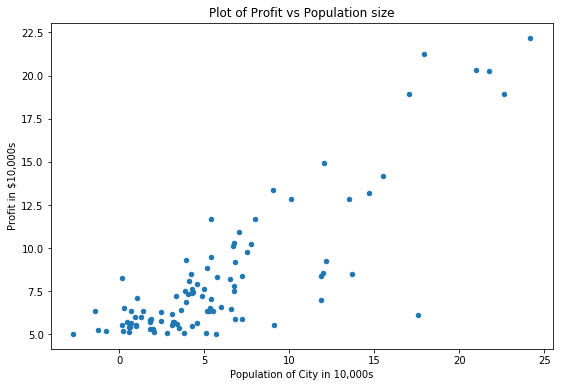

In [4]:
df.plot(kind='scatter', x='profit', y='population', figsize=(9,6));
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('Plot of Profit vs Population size')
plt.show();

**Linear regression** is an approach to modeling the relationship between a dependent variable(the target) and one or more independent variables(the features). 

- **simple linear regression** - there's one independent variable.
- **multiple linear regression** - there's 2 or more independent variables.

The objective of linear regression is to minimize the **cost function** so as to find the line of best fit through the data points. 

We'll to create a linear model of the data X, using some number of parameters theta, that describes the variance of the data such that given a new data point (that's not in X), we can accurately predict what the outcome y will be.

In this implementation we're going to use **gradient descent** to find the parameters theta.

The cost function evaluates the quality of our model by calculating the error between our model's prediction for a data point, using the model parameters, and the actual data point. For example, if the population for a given city is 4 and we predicted that it was 7, our error is (7-4)^2 = 3^2 = 9 (assuming an L2 or "least squares" loss function). We do this for each data point in X and sum the result to get the cost. 

In [14]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

We need to add another dimension(column) to our dataset in order to account for the theta_0 intercept term in the linear equation, which allows us tr treat it as another 'feature'.

In [6]:
df.insert(0, 'ones', 1)
df.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


We also need to divide our dataset into our 'X' and 'y' values and convert these into matrices.

In [17]:
df_X = df[['ones', 'population']]
df_y = df[['profit']]

X = np.matrix(df_X.values)
y = np.matrix(df_y.values)
theta = np.matrix(np.array([0,0]))

# cols = df.shape[1]
# X = df.iloc[:,0:cols-1]
# y = df.iloc[:,cols-1:cols]

# X = np.matrix(X.values)
# y = np.matrix(y.values)
# theta = np.matrix(np.array([0,0]))

In [18]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

Since our parameters are initialized to 0, the solution is not optimal yet.

In [19]:
computeCost(X, y, theta)

32.072733877455676

Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the exercise text. 

The idea with **gradient descent** is that for each iteration, we compute the gradient of the error term in order to figure out the appropriate direction to move our parameter vector. In other words, we're calculating the changes to make to our parameters in order to reduce the error, thus bringing our solution closer to the optimal solution (i.e best fit).

In [20]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

To test the solution we'll define **alpha** and **iters**. Alpha is the learning rate - it's a factor in the update rule for the parameters that helps determine how quickly the algorithm will converge to the optimal solution. Iters is the number of iterations. Deciding on the values to use involves trial-and-error.

In [22]:
# test the solution
alpha = 0.01
iters = 1000

# perform gradient descent
g, cost = gradientDescent(X, y, theta, alpha, iters)
print(g)

[[-3.24140214  1.1272942 ]]


We can now test our model using the computeCost function once more.

In [23]:
computeCost(X, y, g)

4.515955503078912

### Visualize the results

We'll overlay a line representing our model on top of a scatter plot of the data to see how well it fits.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

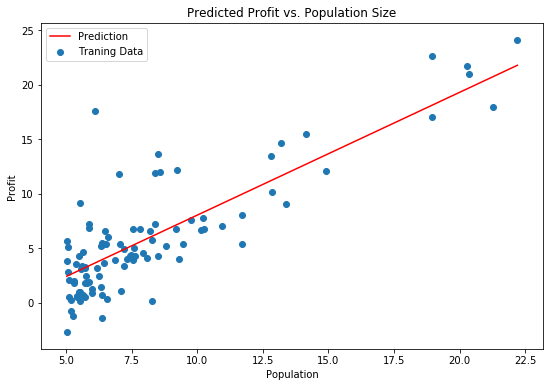

In [28]:
x = np.linspace(df.population.min(), df.population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Plotting the cost at each iteration of our model, we can see it's improvement in performance.

Text(0.5, 1.0, 'Error vs. Training Epoch')

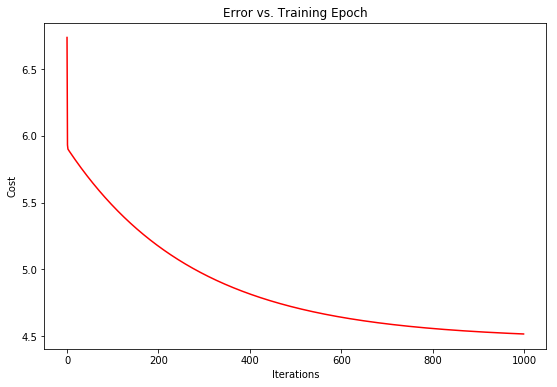

In [32]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Implementing the solution using Scikit-Learn

We'll use the "predict" function to get the predicted y values in order to draw the line.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

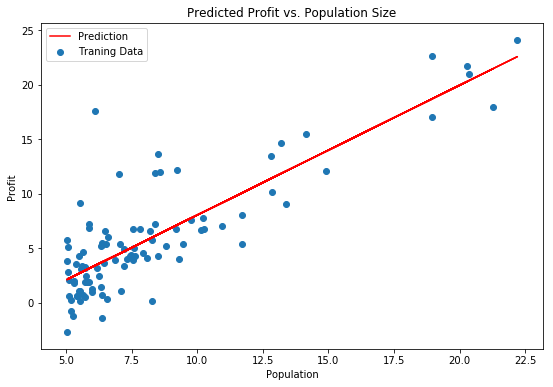

In [46]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

# 
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

### Multiple Linear Regression 

We'll extend our example above to use two independent variables, instead of one. This time we'll predict the house price given two independent variables, number of bedrooms,a dn size of the house in sq. feet.

In [41]:
df_house = pd.read_csv('data/ex1data2.txt', header=None, names=['size', 'bedrooms', 'price'])
df_house.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


We'll need to normalize(scale) our data values otherwise the 'size' feature will be weighted too heavily and end up dwarfing 'bedrooms' in the model. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation. 

In [42]:
df_house = (df_house - df_house.mean()) / df_house.std()
df_house.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


We don't need to change the `gradientDescent()` function. It will work correctly no matter how many variables (columns) are in `X`, as long as the number of parameters in `theta` agree. Similarly, it will compute the `error` term for every row in `X` as long as the number of rows in `y` agree. Our `computeCost()` function will also work.

Creating aour matrices:

In [43]:
df_house.insert(0, 'ones', 1)
df_house_X = df_house[['ones', 'size', 'bedrooms']]
df_house_y = df_house[['price']]

X_house = np.matrix(df_house_X.values)
y_house = np.matrix(df_house_y.values)
theta_house = np.matrix(np.array([0,0,0]))

Calculating the gradient descent and cost

In [44]:
g_house, cost_house = gradientDescent(X_house, y_house, theta_house, alpha, iters)
computeCost(X_house, y_house, g_house)

0.13070336960771892

Ploting the training progress to confirm that the error was in fact decreasing with each iteration of gradient descent.

Text(0.5, 1.0, 'Error vs. Training Epoch')

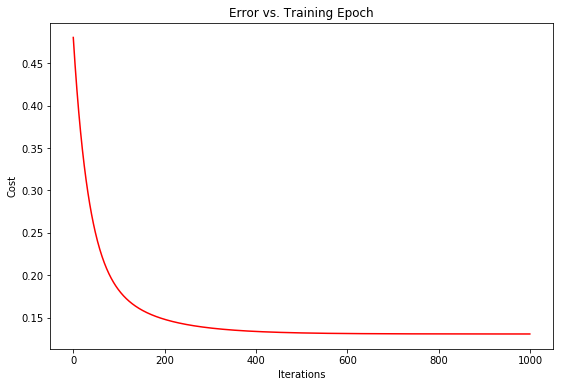

In [45]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iters), cost_house, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')